In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AMZN.csv to AMZN.csv
Saving bonds.csv to bonds.csv
Saving BTC.csv to BTC.csv
Saving CME_HO1.csv to CME_HO1.csv
Saving CME_NG1.csv to CME_NG1.csv
Saving daily_rates.csv to daily_rates.csv
Saving diet.csv to diet.csv
Saving DJI.csv to DJI.csv
Saving ETH.csv to ETH.csv
Saving HRB.csv to HRB.csv
Saving MSFT.csv to MSFT.csv
Saving NOAA_TAVG.csv to NOAA_TAVG.csv
Saving Sprint_Intraday.txt to Sprint_Intraday.txt
Saving stocks.csv to stocks.csv
Saving UFO.csv to UFO.csv
Saving x.csv to x.csv
Saving y.csv to y.csv


In [3]:
HRB = pd.read_csv('HRB.csv', index_col=0)
HRB.index = pd.to_datetime(HRB.index) + pd.offsets.QuarterBegin(startingMonth=1)
HRB.head()

/tmp/ipython-input-3-2621924763.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  HRB.index = pd.to_datetime(HRB.index) + pd.offsets.QuarterBegin(startingMonth=1)


,Earnings
Quarter,
2007-04-01,-0.36
2007-07-01,-0.38
2007-10-01,0.07
2008-01-01,1.85
2008-04-01,-0.34


<Axes: xlabel='Quarter'>

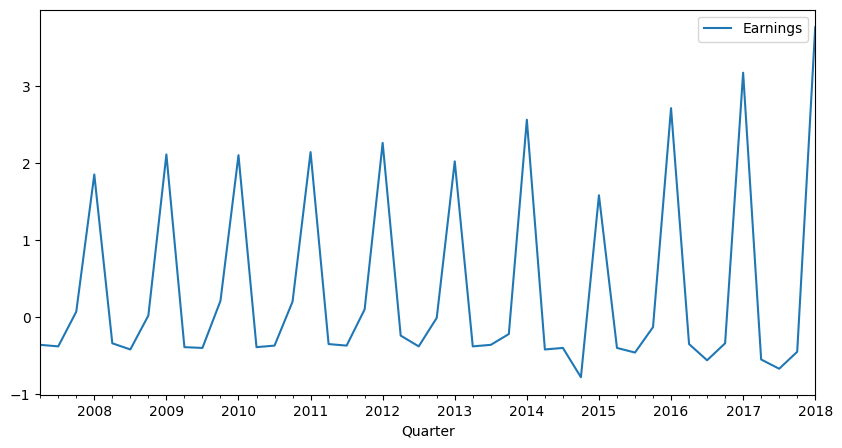

In [4]:
HRB.plot()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


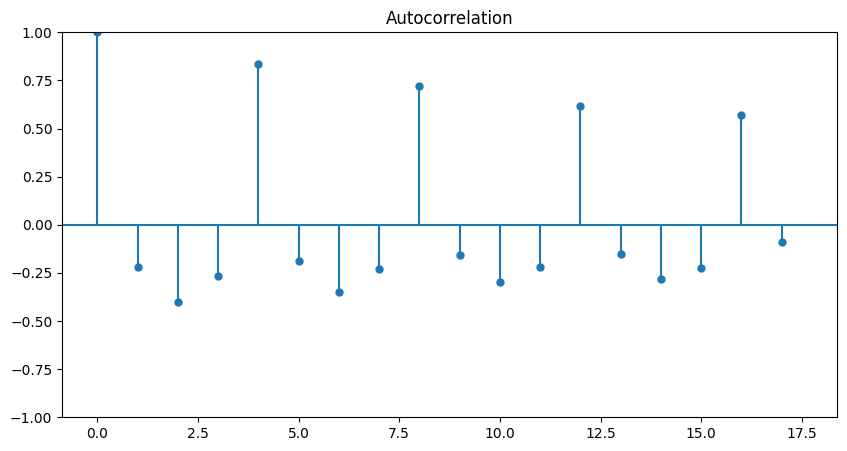

In [5]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1);

In [7]:
MSFT = pd.read_csv('MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index, format="%m/%d/%Y")
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [8]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change().dropna()

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


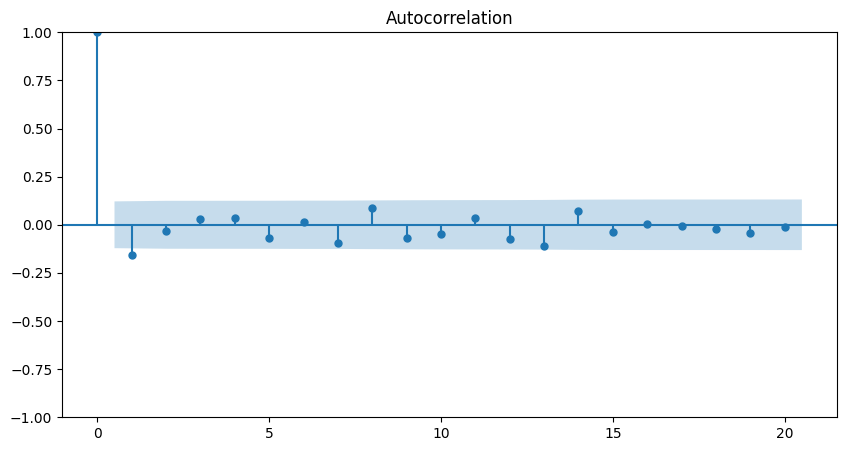

In [9]:
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96 / sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" % (conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20);

The mean is 0.021 and the standard deviation is 0.048


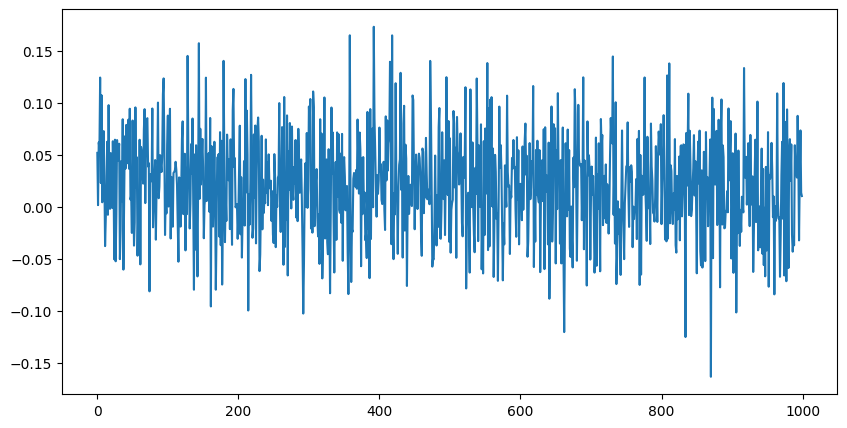

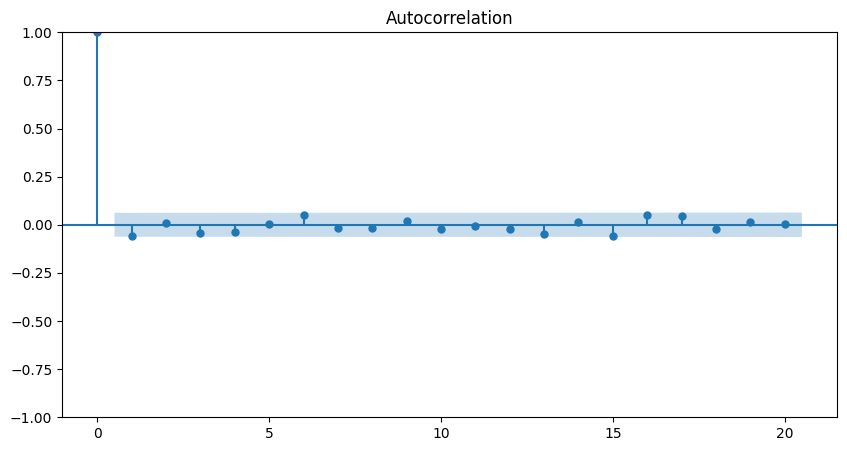

In [10]:
# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" % (mean, std))

# Plot return series
plt.plot(returns);

# Plot autocorrelation functino of white noise returns
plot_acf(returns, lags=20);

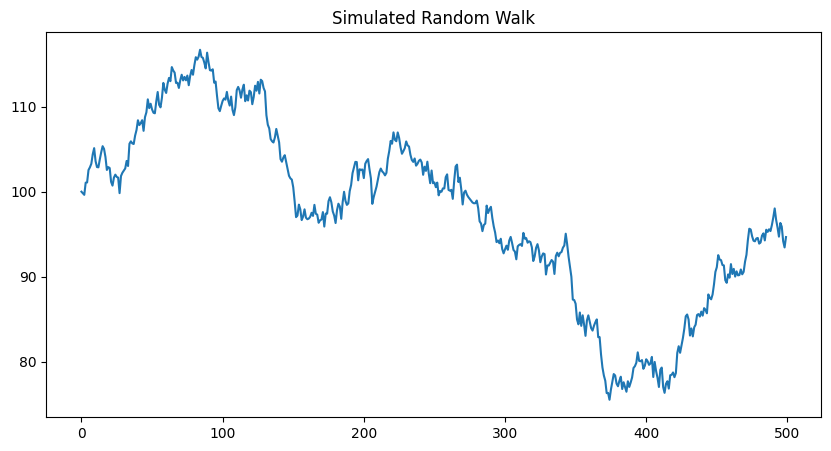

In [11]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0] = 0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P);
plt.title("Simulated Random Walk");

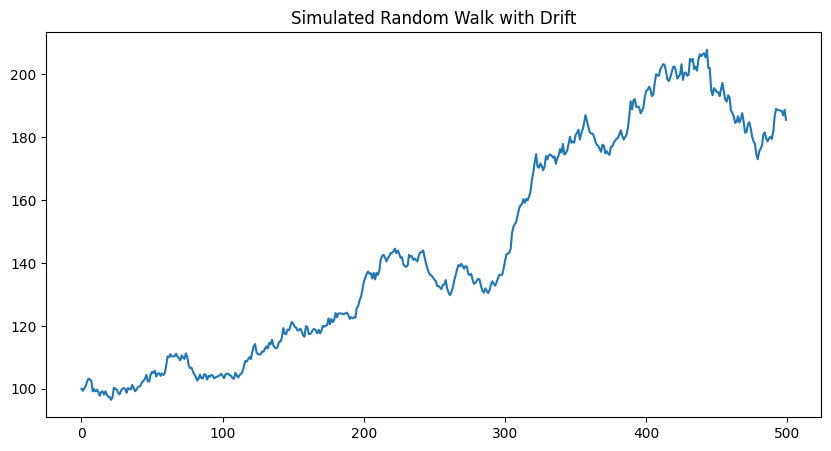

In [12]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0] = 1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P);
plt.title("Simulated Random Walk with Drift");

In [13]:
AMZN = pd.read_csv('AMZN.csv', index_col=0)
AMZN.index = pd.to_datetime(AMZN.index, format='%m/%d/%Y')
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [14]:
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(np.float64(4.025168525770738), 1.0, 33, 5054, {'1%': np.float64(-3.4316445438146865), '5%': np.float64(-2.862112049726916), '10%': np.float64(-2.5670745025321304)}, np.float64(30308.64216426981))
The p-value of the test on prices is: 1.0


In [15]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808348158e-22


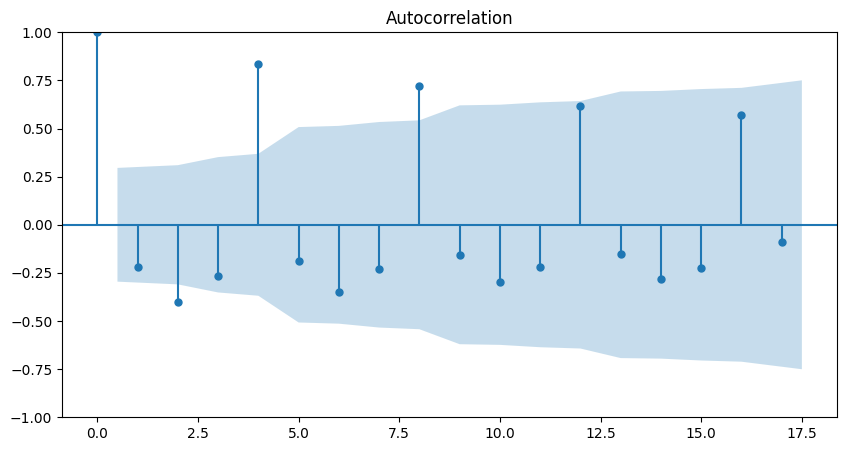

In [20]:
plot_acf(HRB);

            Earnings
Quarter             
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01       NaN
2008-04-01      0.02
2008-07-01     -0.04
2008-10-01     -0.05
2009-01-01      0.26
2009-04-01     -0.05
2009-07-01      0.02


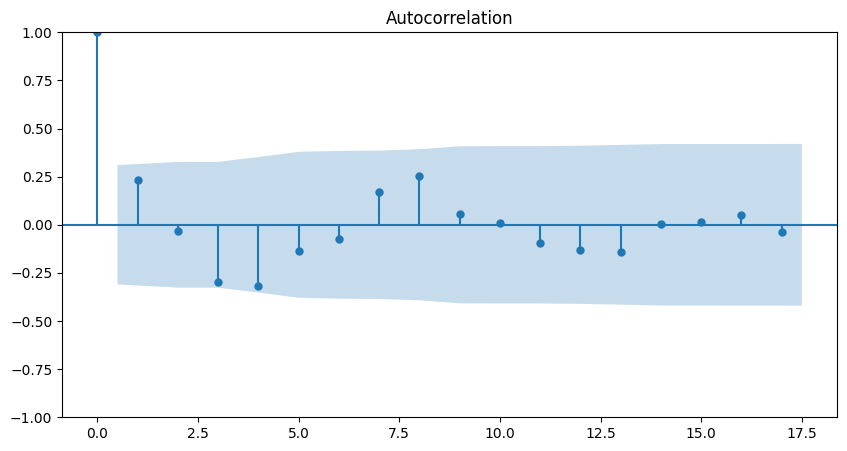

In [21]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa);